# Business Intelligence - Group 53 - Assignment 2

## Packages 

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.pylab as plt
import scipy.sparse as sparse
from pathlib import Path
import glob
from scipy.stats import ks_2samp
import seaborn as sns

# ...

## Business understanding

In order to understand the data one should first of all understand the business. Below one can find a glossary of terms used in MMA (UFC) and their explanations.
* **Knockdown**:  A fight-ending strike. If a fighter loses consciousness ("goes limp") as a result of legal strikes it is declared a KO.
* **(Guard) pass**: A guard pass is simply a way for the fighter on top to get past the legs of the fighter on the bottom in order to reach a dominant position on the ground
* **Reversal**: Transition from a neutral or inferior position to a dominant position
* **Submission**: A submission is a combat sports term for yielding to the opponent, and hence resulting in an immediate defeat. The submission - then also referred to as a "tap out" or "tapping out" - is often performed by visibly tapping the floor or the opponent with the hand or in some cases with the foot, or by saying the word 'tap' to signal the opponent and/or the referee of the submission
* **Takedown**: A takedown is a technique that involves off-balancing an opponent and bringing him or her to the ground with the attacker landing on top.
* **Strikes**: There are two different groupings for strikes. 
  * based on body sections: **HEAD**, **BODY**, **LEG** 
  * based on positions/ranges
    * **Clinch**: A position in which two standing individuals have grabbed ahold of one another. Strikes given and taken in a clinch position.
    * **Ground**: Strikes given and taken when the fighters are on the ground
    * **Distance**: Distance strikes are all strikes that are not clinche-strikes or ground strikes. This is the most common type of striking.
* **Stance**: Which foot is placed closer to the opponent. E.g. left in orthodox stance and right in southpaw


## Data understanding

Analyze the characteristics of the dataset (size, attribute types and semantics as discussed in class, value ranges, sparsity, min/max values, outliers, missing values, ...), and describe this in the report

### Data description

Following clustering of attributes is based on logical grouping and not on the attribute type. Many attributes are prefixed with either 'r' or 'b' which stands for red or blue fighter. To not copy every attribute description for each prefix those attributes in the following tables are prefixed with b/r_.

#### Bout stats
Attribute | Description | Attribute type 
--- | --- | ---
Referee | Name of Referee | Nominal
location | Fight location | Nominal
weight_class | Weight class of this bout and fighters | Ordinal
Date | Date of fight | Ordinal
title_bout | Stating whether the bout was a title bout | Binary
Winner | Winner of the fight | Nominal
no_of_rounds | Number of rounds the bout had. | Ratio

#### Basic fighter stats
Attribute | Description | Attribute type 
--- | --- | ---
b/r_fighter | Name of respective fighter | Nominal
b/r_Stance | Fighting stance | Nominal
b/r_age | Age of fighter | Ratio
b/r_Height_cms | The fighter's height | Ratio
b/r_Reach_cms | The fighter's reach | Ratio
b/r_Weight_lbs | The fighter's weight in lbs | Ratio

#### Fighter bout stats
Attribute | Description | Attribute type 
--- | --- | ---
b/r_win_by_Decision_Majority | Wins by Decision of the majority | Ratio
b/r_win_by_Decision_Split | Wins by Decision Split | Ratio
b/r_win_by_Decision_Unanimous | Wins by Decision Unanimous | Ratio
b/r_win_by_KO/TKO | Wins by Knockout or technical Knockout | Ratio
b/r_win_by_Submission | Wins by submission | Ratio
b/r_win_by_TKO_Doctor_Stoppage | Wins due to doctor stopping the fight | Ratio
b/r_wins | Total number of wins for the fighter | Ratio
b/r_losses | Total number of losses for the fighter | Ratio
b/r_draw | How many draws did the fighter have | Ratio
b/r_current_lose_streak | How many fights did the fighter lose in a row since last win | Ratio
b/r_current_win_streak | How many fights did the fighter win in a row since the last loss | Ratio
b/r_longest_win_streak | How many fights did the fighter win in a row at his/her longest | Ratio
b/r_total_rounds_fought | Number of rounds the fighter fought in total | Ratio
b/r_total_time_fought(seconds) | Total fighting time in seconds | Ratio
b/r_total_title_bouts | How many title bouts did the fighter have so far | Ratio

#### Fighter infight moves stats 
Attribute | Description | Attribute type 
--- | --- | ---
b/r_avg_BODY_att | Average body attacks attended (fighter level) | Ratio
b/r_avg_BODY_landed | Average attacks landed (fighter level) | Ratio
b/r_avg_HEAD_att | Average head attacks attended (fighter level) | Ratio
b/r_avg_HEAD_landed | Average head attacks landed (fighter level) | Ratio
b/r_avg_LEG_att |  Average leg attacks attended (fighter level) | Ratio
b/r_avg_LEG_landed |  Average leg attacks landed (fighter level) | Ratio
b/r_avg_CLINCH_att | Average clinches attended (fighter level) | Ratio
b/r_avg_CLINCH_landed | Average clinches landed (fighter level) | Ratio
b/r_avg_DISTANCE_att | Average distance strikes attended (fighter level) | Ratio
b/r_avg_DISTANCE_landed | Average distance strikes landed (fighter level) | Ratio
b/r_avg_GROUND_att | Average ground strikes attended (fighter level) | Ratio
b/r_avg_GROUND_landed | Average ground strikes landed (fighter level) | Ratio
b/r_avg_SIG_STR_att | Average significant strikes attended (fighter level) | Ratio
b/r_avg_SIG_STR_landed | Average significant strikes landed (fighter level) | Ratio
b/r_avg_SIG_STR_pct | | Ratio
b/r_avg_TD_att | Average tackedowns (fighter level) | Ratio
b/r_avg_TD_landed | Average tackedowns landed (fighter level) | Ratio
b/r_avg_TD_pct | | Ratio
b/r_avg_TOTAL_STR_att | Average total strikes attended (fighter level) | Ratio
b/r_avg_TOTAL_STR_landed | Average total strikes landed (fighter level) | Ratio
b/r_avg_KD | Average knockdowns (fighter level) | Ratio
b/r_avg_PASS | Average passes (fighter level) | Ratio
b/r_avg_REV | Average reversals (fighter level) | Ratio
b/r_avg_SUB_ATT | Average submissions (fighter level) | Ratio

#### Unkown attributes
Attribute | Description | Attribute type 
--- | --- | ---
b/r_avg_opp_BODY_att | Average body attacks attended (fighter level) | Ratio
b/r_avg_opp_BODY_landed | Average attacks landed (fighter level) | Ratio
b/r_avg_opp_HEAD_att | Average head attacks attended (fighter level) | Ratio
b/r_avg_opp_HEAD_landed | Average head attacks landed (fighter level) | Ratio
b/r_avg_opp_LEG_att |  Average leg attacks attended (fighter level) | Ratio
b/r_avg_opp_LEG_landed |  Average leg attacks landed (fighter level) | Ratio
b/r_avg_opp_CLINCH_att | Average clinches attended (fighter level) | Ratio
b/r_avg_opp_CLINCH_landed | Average clinches landed (fighter level) | Ratio
b/r_avg_opp_DISTANCE_att | Average distance strikes attended (fighter level) | Ratio
b/r_avg_opp_DISTANCE_landed | Average distance strikes landed (fighter level) | Ratio
b/r_avg_opp_GROUND_att | Average ground strikes attended (fighter level) | Ratio
b/r_avg_opp_GROUND_landed | Average ground strikes landed (fighter level) | Ratio
b/r_avg_opp_SIG_STR_att | Average significant strikes attended (fighter level) | Ratio
b/r_avg_opp_SIG_STR_landed | Average significant strikes landed (fighter level) | Ratio
b/r_avg_opp_SIG_STR_pct | | Ratio
b/r_avg_opp_TD_att | Average tackedowns (fighter level) | Ratio
b/r_avg_opp_TD_landed | Average tackedowns landed (fighter level) | Ratio
b/r_avg_opp_TD_pct | | Ratio
b/r_avg_opp_TOTAL_STR_att | Average total strikes attended (fighter level) | Ratio
b/r_avg_opp_TOTAL_STR_landed | Average total strikes landed (fighter level) | Ratio
b/r_avg_opp_KD | Average knockdowns (fighter level) | Ratio
b/r_avg_opp_PASS | Average passes (fighter level) | Ratio
b/r_avg_opp_REV | Average reversals (fighter level) | Ratio
b/r_avg_opp_SUB_ATT | Average submissions (fighter level) | Ratio

We clustered the attributes into five logical clusters. The first one, "Bout stats", gives away basic information about the bout itself ( e.g. when it took place, which weight class, who was the referee, ...).  Mostly nominal and ordinal attributes are grouped here. The second cluster is about basic fighter attributes of descriptive nature (height, weight, age, ...). The third cluster captures basic stats about the fighter. As already mentioned there are two fighter attributes for each fighter which differ only in the prefix. (R_ or B_). This cluster has also one aggregated attribute "R/B_wins" which should be the sum of six other "win characteristics" referring to the way the fighter won (e.g. R_win_by_KO/TKO). It is a first sign of Colinearity between the sub characteristics of win and win itself. The forth cluster contains stats about the different moves and strikes the fighters did in their fights so far. It also contains aggregated attributes such as b/r_avg_opp_SIG_STR_att and b/r_avg_opp_SIG_STR_landed. Later two attributes aggregate "HEAD, BODY, LEG" as well as "DISTANCE, GROUND, CLINCH" strikes, attended and landed respectively.

In [9]:
'''
-Identify data and method of capture
-Perform basic statistical analysis
    “For each attribute compute the basic statistics”
    - Average
    - Min/max values
    - Variance, standard deviation, mode, skewness, …
    - Histogram: encoding issues (0, 99, -1, 1.1.1900, …)
    - Correlation between attributes
'''

def load_ufc_data():
    
    path = Path("../data/data.csv")
    ufc_data = pd.read_csv(path, header=0, delimiter=",")
    
    return ufc_data

data_ufc = load_ufc_data()

def semantics_check():
    data_ufc_check = data_ufc.copy()
    data_ufc_check.dropna(inplace=True)
    
    # Current win streak must be smaller or equal than wins
    assert np.less_equal(data_ufc_check['R_current_win_streak'].values, 
                               data_ufc_check['R_wins'].values).all()
    
    # Current lose streak must be smaller or equal than total losses
    assert np.less_equal(data_ufc_check['R_current_lose_streak'].values, 
                               data_ufc_check['R_losses'].values).all()
    
    # Wins must be the sum of all sub win characteristics
    # Is not always the case, that is why the condition is weaker here. Maybe data quality issue
    np.less_equal(data_ufc_check.loc[:,'R_wins'],
                        data_ufc_check.loc[:,['R_win_by_Decision_Majority',
                                              'R_win_by_Decision_Split',
                                              'R_win_by_Decision_Unanimous',
                                              'R_win_by_KO/TKO',
                                              'R_win_by_Submission',
                                              'R_win_by_TKO_Doctor_Stoppage']].sum(axis=1)).all()
                       
    
       
    # Signficant strikes must equal the sum of each categorized strike group's characteristics  
    assert np.allclose(data_ufc_check.loc[:,'R_avg_SIG_STR_att'],
                data_ufc_check.loc[:,['R_avg_CLINCH_att','R_avg_DISTANCE_att',
                                      'R_avg_GROUND_att']].sum(axis=1), 
                rtol=0.00001)
    assert np.allclose(data_ufc_check.loc[:,'R_avg_SIG_STR_att'],
                data_ufc_check.loc[:,['R_avg_BODY_att','R_avg_HEAD_att','R_avg_LEG_att']].sum(axis=1), 
                rtol=0.00001)
    assert np.allclose(data_ufc_check.loc[:,['R_avg_CLINCH_att','R_avg_DISTANCE_att',
                                             'R_avg_GROUND_att']].sum(axis=1),
                data_ufc_check.loc[:,['R_avg_BODY_att','R_avg_HEAD_att','R_avg_LEG_att']].sum(axis=1), 
                rtol=0.00001)
    
    # Strikes based on body sections and positions/ranges. 
    # There must be more or euqal attended strikes than landed
    assert np.greater_equal(data_ufc_check.loc[:,'R_avg_HEAD_att'].values,
                   data_ufc_check.loc[:,'R_avg_HEAD_landed'].values).all()
    assert np.greater_equal(data_ufc_check.loc[:,'R_avg_BODY_att'].values,
                   data_ufc_check.loc[:,'R_avg_BODY_landed'].values).all()
    assert np.greater_equal(data_ufc_check.loc[:,'R_avg_LEG_att'].values,
                   data_ufc_check.loc[:,'R_avg_LEG_landed'].values).all()
    assert np.greater_equal(data_ufc_check.loc[:,'R_avg_CLINCH_att'].values,
                   data_ufc_check.loc[:,'R_avg_CLINCH_landed'].values).all()
    assert np.greater_equal(data_ufc_check.loc[:,'R_avg_DISTANCE_att'].values,
                   data_ufc_check.loc[:,'R_avg_DISTANCE_landed'].values).all()
    assert np.greater_equal(data_ufc_check.loc[:,'R_avg_GROUND_att'].values,
                   data_ufc_check.loc[:,'R_avg_GROUND_landed'].values).all()
    
    # Takedowns, significant strikes, total strikes
    # There must be more or euqal attended strikes/moves than landed
    assert np.greater_equal(data_ufc_check.loc[:,'R_avg_SIG_STR_att'].values,
                   data_ufc_check.loc[:,'R_avg_SIG_STR_landed'].values).all()  
    assert np.greater_equal(data_ufc_check.loc[:,'R_avg_TD_att'].values,
                   data_ufc_check.loc[:,'R_avg_TD_landed'].values).all()
    assert np.greater_equal(data_ufc_check.loc[:,'R_avg_TOTAL_STR_att'].values,
                   data_ufc_check.loc[:,'R_avg_TOTAL_STR_landed'].values).all()
    return "Assertions passed. Check the assertions to learn more about the semantics of this data set."
semantics_check()


'Assertions passed. Check the assertions to learn more about the semantics of this data set.'

The condition "Wins must be the sum of all sub win characteristics" is not always fullfiled. Only the condition "sum sub win characteristics <= wins" is fullfilled. All other semantics are valid.

In [70]:
# Checking whether R and B are from the same distribution
r_attributes = ['R_age','R_Height_cms', 'R_Weight_lbs', 'R_Reach_cms',
                'R_avg_SIG_STR_att', 'R_avg_SIG_STR_landed', 'R_avg_TD_att',
                'R_avg_TD_landed', 'R_avg_KD', 'R_wins', 'R_losses',
                'R_total_time_fought(seconds)']
b_attributes = ['B_age', 'B_Height_cms', 'B_Weight_lbs', 'B_Reach_cms',
                'B_avg_SIG_STR_att', 'B_avg_SIG_STR_landed', 'B_avg_TD_att',
                'B_avg_TD_landed', 'B_avg_KD', 'B_wins', 'B_losses',
                'B_total_time_fought(seconds)']
for i in range(len(r_attributes)):
    print(r_attributes[i])
    data = data_ufc.loc[:,[r_attributes[i], b_attributes[i]]].dropna()
    x = data[b_attributes[i]].sort_values()
    y = data[r_attributes[i]].sort_values()
    print(ks_2samp(x,y))


R_age
Ks_2sampResult(statistic=0.04143088116410671, pvalue=0.0004090161094990995)
R_Height_cms
Ks_2sampResult(statistic=0.022598870056497175, pvalue=0.14534096969736768)
R_Weight_lbs
Ks_2sampResult(statistic=0.009735202492211837, pvalue=0.9680739977284712)
R_Reach_cms
Ks_2sampResult(statistic=0.01589825119236884, pvalue=0.6340491472005213)
R_avg_SIG_STR_att
Ks_2sampResult(statistic=0.052083333333333336, pvalue=0.00010045436767024714)
R_avg_SIG_STR_landed
Ks_2sampResult(statistic=0.06524122807017543, pvalue=3.578447750666425e-07)
R_avg_TD_att
Ks_2sampResult(statistic=0.05345394736842105, pvalue=5.9240119080182335e-05)
R_avg_TD_landed
Ks_2sampResult(statistic=0.0712719298245614, pvalue=1.768182045708713e-08)
R_avg_KD
Ks_2sampResult(statistic=0.0912828947368421, pvalue=1.2109158905059224e-13)
R_wins
Ks_2sampResult(statistic=0.15493779160186624, pvalue=2.8881187846506676e-54)
R_losses
Ks_2sampResult(statistic=0.11450233281493001, pvalue=8.910912267326086e-30)
R_total_time_fought(seconds)
K

Interestingly, a lot of R and B attribute pairs do not come from the same distribution as indicated by small p-values. It seems that there are e.g. totally different distributions in age between the red and the blue fighter. Also the differently distributed wins are somewhat suspicious. This we need to re-check again with a histogram in the data exploration section.

In [50]:
def basic_statistics(data):
    print(data.describe())
    
# Dataframes of clustered attributes in "Data understanding"
data_ufc_basic_fighter_stats = data_ufc.loc[:,['R_age', 'R_Height_cms', 'R_Weight_lbs', 'R_Reach_cms']]
data_ufc_basic_bout_stats = data_ufc.loc[:,['no_of_rounds']]
data_ufc_fighter_bout_stats = data_ufc.loc[:,['R_win_by_Decision_Majority',
                                              'R_win_by_Decision_Split',
                                              'R_win_by_Decision_Unanimous',
                                              'R_win_by_KO/TKO',
                                              'R_win_by_Submission',
                                              'R_win_by_TKO_Doctor_Stoppage',
                                              'R_wins',
                                              'R_losses',
                                              'R_draw',
                                              'R_current_lose_streak',
                                              'R_current_win_streak',
                                              'R_longest_win_streak',
                                              'R_total_rounds_fought',
                                              'R_total_time_fought(seconds)',
                                              'R_total_title_bouts']]

data_ufc_fighter_infight_moves_stats = data_ufc.loc[:, ['R_avg_BODY_att',
                                                        'R_avg_BODY_landed',
                                                        'R_avg_HEAD_att',
                                                        'R_avg_HEAD_landed',
                                                        'R_avg_LEG_att',
                                                        'R_avg_LEG_landed',
                                                        'R_avg_CLINCH_att',
                                                        'R_avg_CLINCH_landed',
                                                        'R_avg_DISTANCE_att',
                                                        'R_avg_DISTANCE_landed',
                                                        'R_avg_GROUND_att',
                                                        'R_avg_GROUND_landed',
                                                        'R_avg_SIG_STR_att',
                                                        'R_avg_SIG_STR_landed',
                                                        'R_avg_SIG_STR_pct',
                                                        'R_avg_TD_att',
                                                        'R_avg_TD_landed',
                                                        'R_avg_TD_pct',
                                                        'R_avg_TOTAL_STR_att',
                                                        'R_avg_TOTAL_STR_landed',
                                                        'R_avg_KD',
                                                        'R_avg_PASS',
                                                        'R_avg_REV',
                                                        'R_avg_SUB_ATT']]

pd.set_option("display.max_columns", None)
print("Basic fighter stats")
basic_statistics(data_ufc_basic_fighter_stats)

print("Bout stats")
basic_statistics(data_ufc_basic_bout_stats)

print("Fighter bout stats")
basic_statistics(data_ufc_fighter_bout_stats)

print("Fighter infight moves stats")
basic_statistics(data_ufc_fighter_infight_moves_stats)

Basic fighter stats
             R_age  R_Height_cms  R_Weight_lbs  R_Reach_cms
count  5080.000000   5140.000000   5141.000000  4828.000000
mean     29.442323    179.274089    172.075861   183.664412
std       4.141927      8.638978     35.164075    10.304375
min      19.000000    152.400000    115.000000   152.400000
25%      26.000000    172.720000    145.000000   177.800000
50%      29.000000    180.340000    170.000000   182.880000
75%      32.000000    185.420000    185.000000   190.500000
max      47.000000    210.820000    345.000000   213.360000
Bout stats
       no_of_rounds
count   5144.000000
mean       3.119362
std        0.631457
min        1.000000
25%        3.000000
50%        3.000000
75%        3.000000
max        5.000000
Fighter bout stats
       R_win_by_Decision_Majority  R_win_by_Decision_Split  \
count                 5144.000000              5144.000000   
mean                     0.027605                 0.280910   
std                      0.166210           

From the description we can already see that there are missing values if we look at the count. The count also reveals that there is a bunch of count groups with equal counts hinting that some attributes might be missing together. E.g. we can see that all "Fighter infight moves stats" have the same count 4494 which is smaller than the number of rows in this data set. By comparing the mean and the median (labeled as 50%) we can confirm the existence of univariate outliers. We see that e.g. R_avg_REV has a median of 0 while the mean is 0.153263. The 3rd quartile is 0.213346 so the mean is much closer to the 3rd quartile than the median. This is an indication of skewness (left-tailed) and skewed variables are problematic for outlier detection with simple methods such as boxplots.

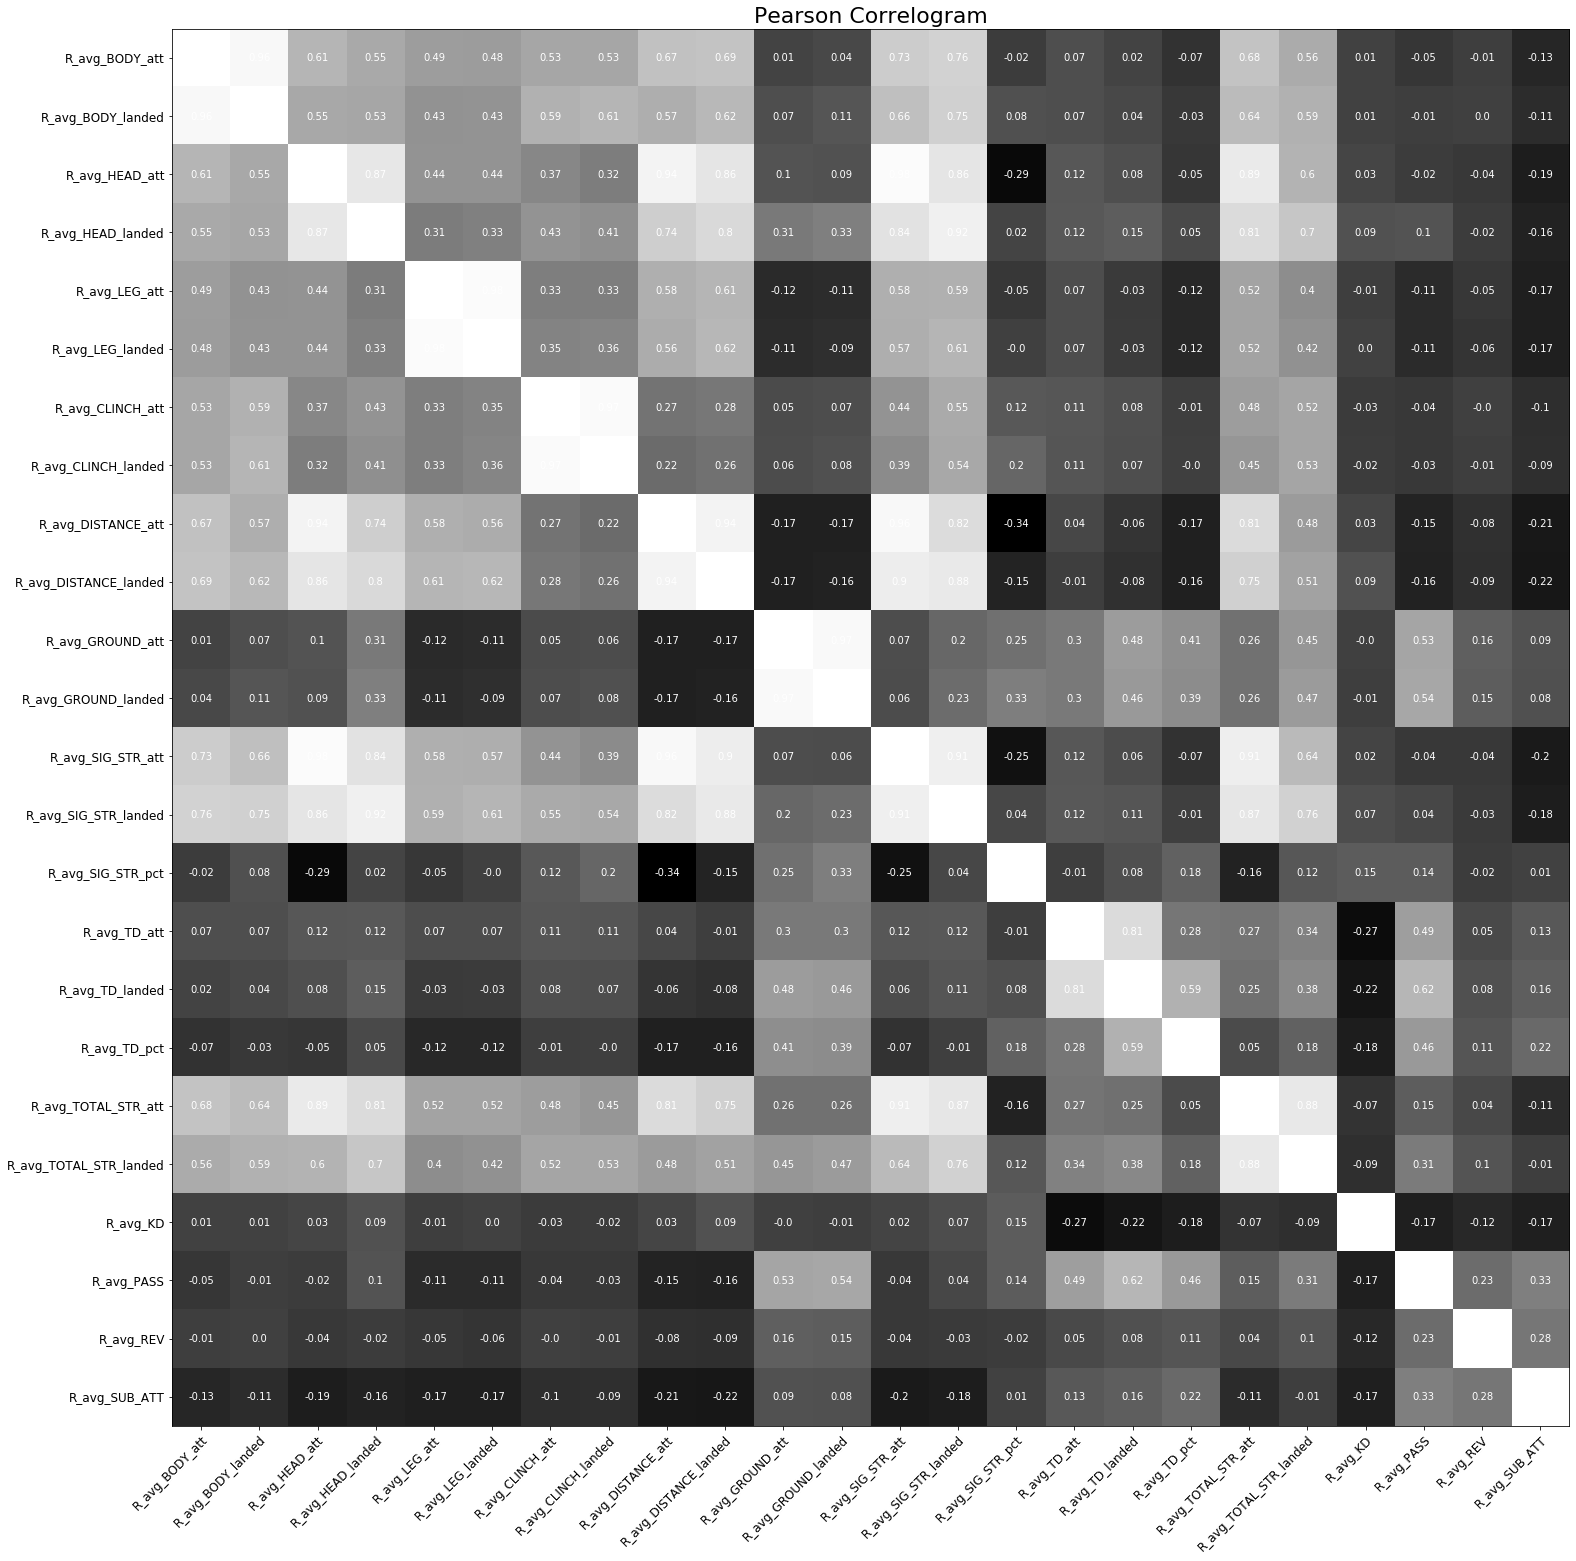

In [217]:
from sklearn.preprocessing import StandardScaler
from matplotlib import cm

data_corr = data_ufc_fighter_infight_moves_stats.copy()

scaler = StandardScaler()
data_merged_scaled = pd.DataFrame(scaler.fit_transform(data_corr),
                                  columns=data_corr.columns)

df = data_corr
fig, ax = plt.subplots(figsize=(25,20))
plt.tight_layout()
corr = data_merged_scaled.corr()
im = ax.imshow(corr,cmap='gray')

# Decorations
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.columns)))
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
ax.set_ylim(len(df.columns)-0.5, -0.5) # just here due to a bug in matplotlib 3.1.1. fixed in 3.1.2

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(df.columns)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, round(corr.iloc[i, j],2),
                       ha="center", va="center", color="w")
        
plt.title('Pearson Correlogram for fighter infight moves stats', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In a regression problem one would use a correlogram to get an idea how well the attributes are able to predict the outcome based on the correlation with the outcome variable. But here we have no outcome variable(s) included. So why do we plot a correlogram? It can help us to detect multicolinearity which in turn we might want to remove for certain ML algorithms. In the case of "fighter infight moves" features we see that every feature pair with suffixes _att and _landed are highly correlated to each other, thus, we could remove features having one of these suffixes to avoid multicolinearity. There are some online [references](https://medium.com/@raj5287/effects-of-multi-collinearity-in-logistic-regression-svm-rf-af6766d91f1b) stating that it could be a problem for SVMs while [others](https://towardsdatascience.com/your-beginner-guide-to-basic-classification-models-logistic-regression-and-svm-b7eef864ec9a) state that there is no impact. It seems that we have to find out for ourselves.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Columns: 145 entries, R_fighter to R_age
dtypes: bool(1), float64(134), int64(1), object(9)
memory usage: 5.7+ MB


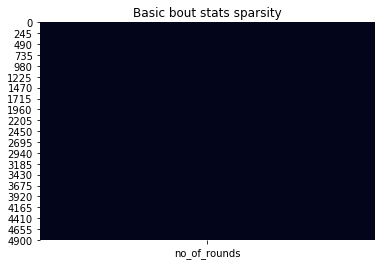

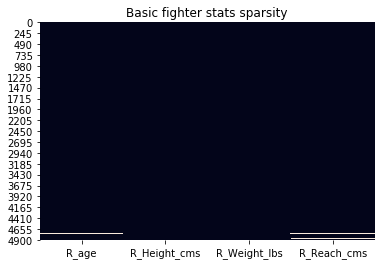

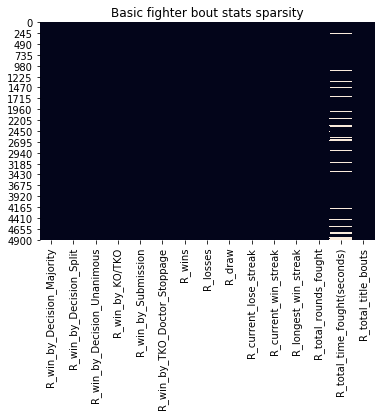

Text(0.5, 1, 'Fighter infight moves stats sparsity')

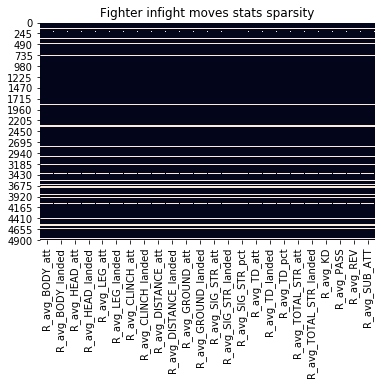

In [160]:
data_ufc.info()
ax = sns.heatmap(data_ufc_basic_bout_stats.isnull(),
            cbar=False,
            #linewidths=.0001
            )
ax.set_title("Basic bout stats sparsity")
plt.show()

ax = sns.heatmap(data_ufc_basic_fighter_stats.isnull(),
            cbar=False,
            #linewidths=.0001
            )
ax.set_title("Basic fighter stats sparsity")
plt.show()

ax = sns.heatmap(data_ufc_fighter_bout_stats.isnull(),
            cbar=False,
            #linewidths=.0001
            )
ax.set_title("Basic fighter bout stats sparsity")
plt.show()

ax = sns.heatmap(data_ufc_fighter_infight_moves_stats.isnull(),
            cbar=False,
            #linewidths=.0001
            )
ax.set_title("Fighter infight moves stats sparsity")



### Data exploration

The following cell will hold a bunch of data sets we will explore more closely. Our biggest interest lies in exploring men and women separately but also different weight classes.

In [161]:
# Visual exploration
# Plot basic statistics
# Identify interesting subpopulations
## E.g. only male fighters and only 4-5 most popular weight classes
# Form hypotheses and identify actions
## E.g. which attributes do contribute significantly to the weight class
# Transform the hypothesis into a data mining goal, if possible
data_ufc_women = data_ufc[data_ufc['weight_class'].isin(["Women's Flyweight",
                                                         "Women's Strawweight",
                                                         "Women's Bantamweight",
                                                         "Women's Featherweight"])]
data_ufc_men = data_ufc[~data_ufc.isin(data_ufc_women)]




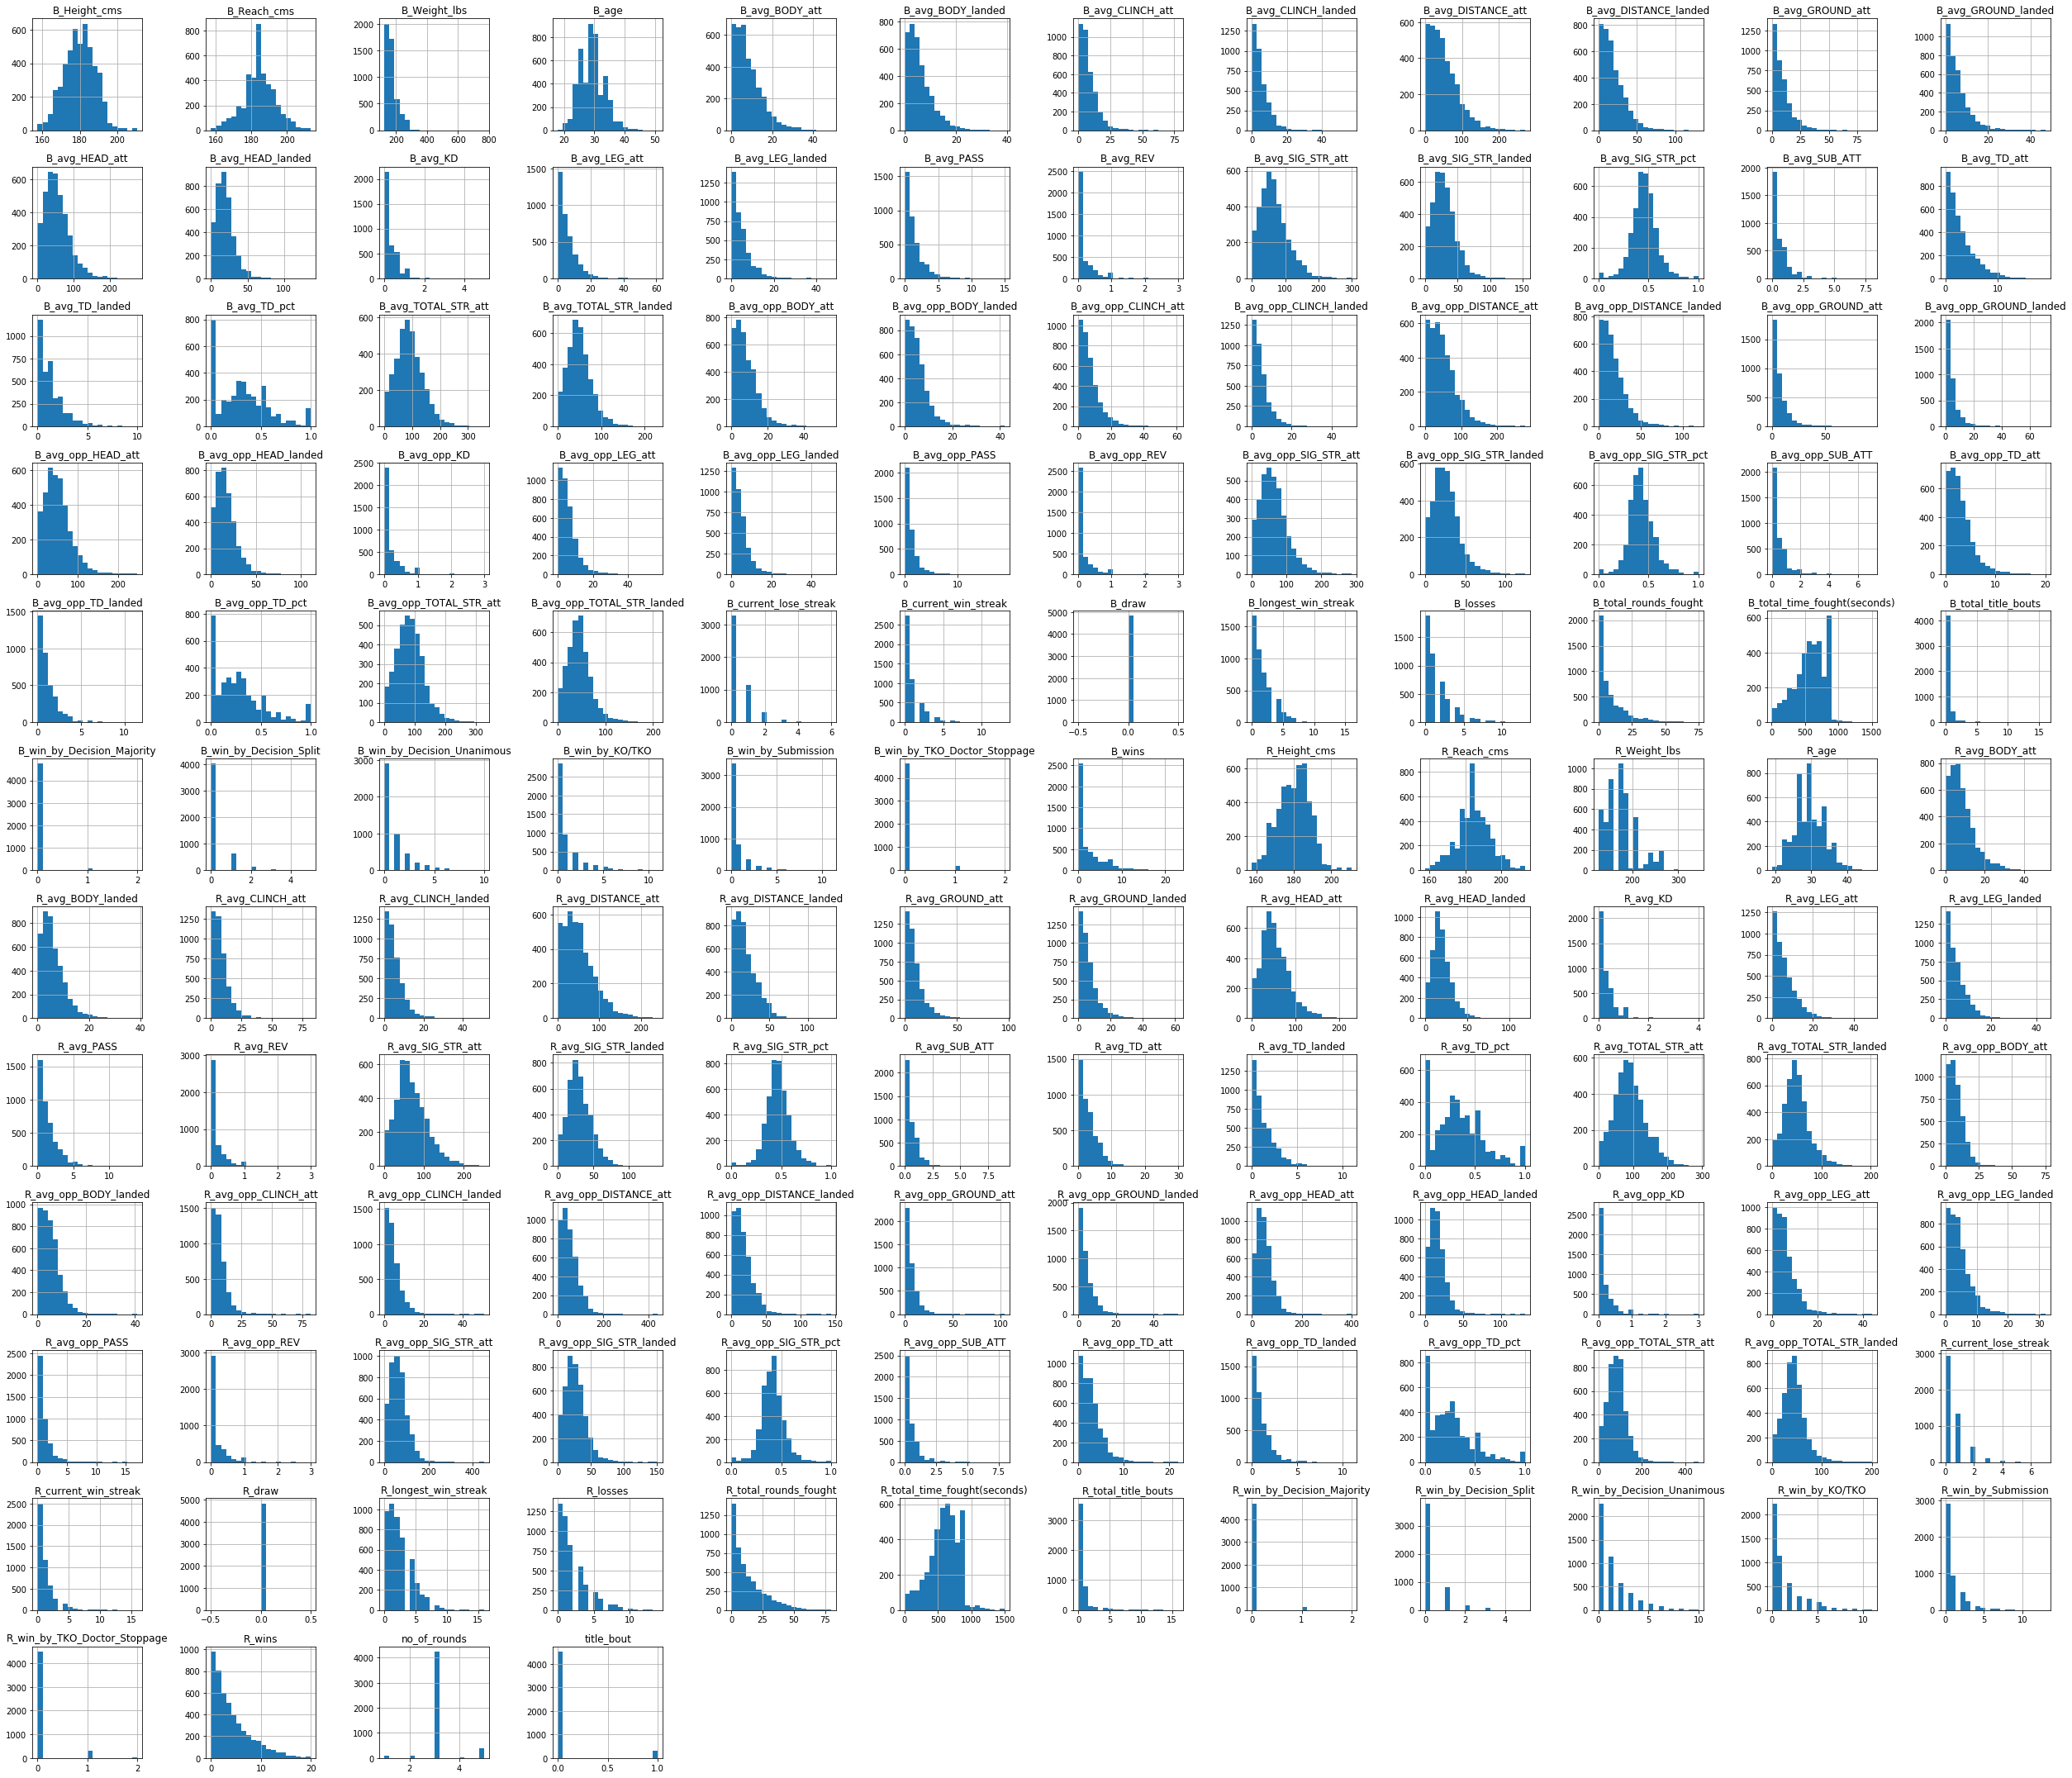

In [162]:
data_ufc_men.hist(figsize=(35,30),
                  bins=20)
plt.tight_layout()
plt.show()

We decided to distinguish between male and female fighters as it is a common separation in sports. Above we plotted the male fighters which are the far bigger subset. We noticed several things:
* Countrary to the test statistics we did in the data description section the distribution of R and B attribute pairs look very similar. Therefore, it sufficies to only focus our investigation on one fighter label, e.g. R.
* We can see that some attributes have little to no distribution. Those attributes are for instance B_draw, R_draw, R_win_by_TKO_Doctor_Stoppage, B_win_by_TKO_Doctor_Stoppage, R_win_by_Decision_Majority. We will exclude them in the further process as they have little variance and thus will not be important for explaining the outcome of weight classes. 
* Another interesting thing is that there are much more blue fighters who have not won any fight than red ones (B_wins vs R_wins). 
* The skewness of wins and losses does also reveal something interesting. As their distribution is the same it means that there are as many fighters who have not won a fight as there are fighters who have not loss any fight. But how does this make sense? It does if there are many fighters with just one record. We will elaborate on this in the next cell.
* There is a lot of skewness in general. Using simple boxplots to detect outliers would therefore be a problem as they rely on symetric data. We will need a multivariate outlier detection approach.

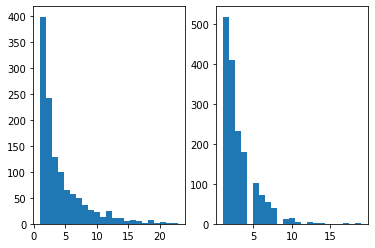

In [183]:
r_fighters = data_ufc_men.groupby('R_fighter').size().sort_values()
b_fighters = data_ufc_men.groupby('B_fighter').size().sort_values()

fig, axes = plt.subplots(1,2)
axes[0].hist(x=r_fighters,bins=23)
axes[1].hist(x=b_fighters,bins=23)
plt.show()

The plots above show how many entries there are in the data for R and B fighters. We see that there are many "one-fight-entries" which supports our finding in the previous step about the similarly skewed wins and losses. This means that a lot of fighters are recorded just once and thus there are many who have not lost or not won a single fight.

### Data quality

In [7]:
# Identify special values and catalog their meaning
# Verify that the meanings of attributes and contained values fit
# Identify missing attributes and blank fields
# Establish the meaning of missing data ! Why is it missing?
# Check for deviations, decide whether it is “noise” or may indicate an interesting phenomenon
# Check for plausability of values
# Review any attributes that give answers that conflict with common sense


### Missing values

### Outliers

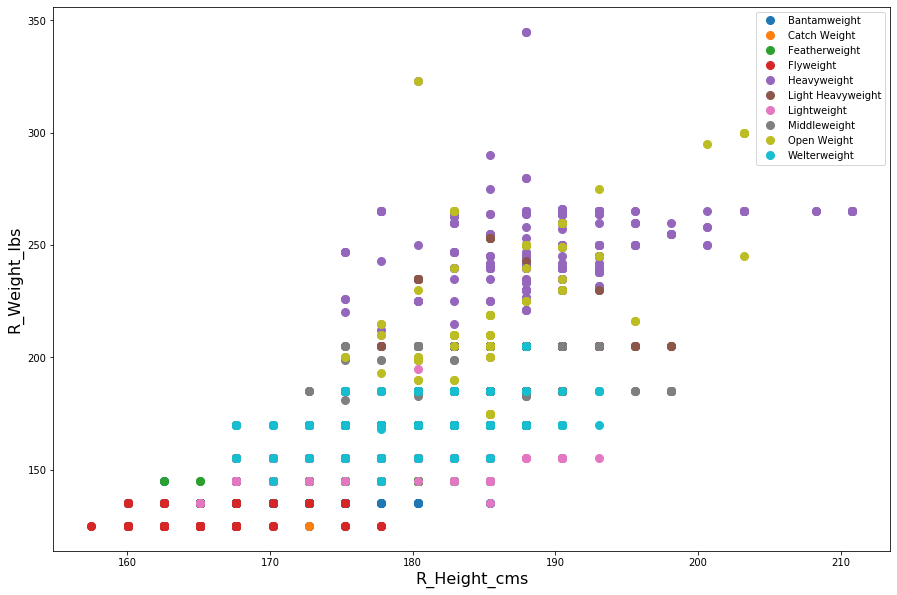

In [148]:
groups = data_ufc_men.groupby('weight_class')

fig, ax = plt.subplots(figsize=(15,10))
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['R_Height_cms'], group['R_Weight_lbs'],
            marker='o', linestyle='', ms=8, label=name)
ax.set_xlabel('R_Height_cms', fontsize=16)
ax.set_ylabel('R_Weight_lbs', fontsize=16)
ax.legend()

plt.show()

This 2-dimensional plot above shows a few vertical outliers. We first want to detect them using ellipsoides and then use this approach to detect multivariate outliers. We will need to tune the epsilon parameter (contamination) for this purpose until we only detect those outliers that are also visually obvious.

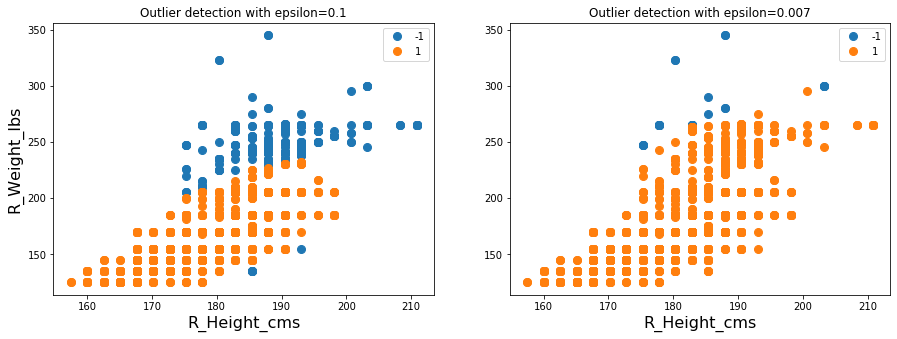

In [149]:
# Multivariate outlier detection with dbscan
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.covariance import EllipticEnvelope

# preprocessing
data_ufc_men_o = data_ufc_men.copy()
data_ufc_men_o = data_ufc_men_o.loc[:,['R_Height_cms',
                                     'R_Weight_lbs']].dropna()
# outlier detection
outlier_detection_1 = EllipticEnvelope(contamination=0.1)
outlier_detection_1.fit(data_ufc_men_o)
prediction_1 = outlier_detection_1.predict(data_ufc_men_o)

outlier_detection_2 = EllipticEnvelope(contamination=0.007)
outlier_detection_2.fit(data_ufc_men_o)
prediction_2 = outlier_detection_2.predict(data_ufc_men_o)

data_ufc_men_o['outliers_1'] = prediction_1
data_ufc_men_o['outliers_2'] = prediction_2

# Plotting outliers
groups = data_ufc_men_o.groupby('outliers_1')
groups_2 = data_ufc_men_o.groupby('outliers_2')

fig, axes = plt.subplots(1,2,figsize=(15,5))

for name, group in groups:
    axes[0].plot(group['R_Height_cms'], group['R_Weight_lbs'],
            marker='o', linestyle='', ms=8, label=name)
    
for name, group in groups_2:
    axes[1].plot(group['R_Height_cms'], group['R_Weight_lbs'],
            marker='o', linestyle='', ms=8, label=name)
    
axes[0].set_xlabel('R_Height_cms', fontsize=16)
axes[0].set_ylabel('R_Weight_lbs', fontsize=16)
axes[0].legend()
axes[0].set_title("Outlier detection with epsilon=0.1")

axes[1].set_xlabel('R_Height_cms', fontsize=16)
axes[1].set_title("Outlier detection with epsilon=0.007")
axes[1].legend()
plt.show()


We see that the choice of epsilon is very important. The outliers shown in the right plot are compliant with our visually detected outliers. We will use this setting to detect multivariate outliers now.

## Data preparation 

### Select data

Subsampling: If the entire dataset is too large to be processed in its entirety, choose a subsampling strategy to get the dataset to a manageable size. Describe in your report why and how you did it. Make sure your experiment is repeatable. (No manual selection of instances, everything must be in code.)

### Clean data

In [ ]:
# Handle missing values and outliers
# eg. by deletion or imputation

### Construct data

Preprocessing: Get the data into the form needed for training your two algorithms. Describe your preprocessing steps (e.g. transcoding, scaling), why you did it and how you did it

In [ ]:
# Transform to different attribute types (Binning, 1-to-n coding, …)
# Add new attributes to the accessed data
# Decide if any attribute should be normalized
# 

In [ ]:
MY ANSWER HERE

## Modeling 

Pick two significantly different classification algorithms, i.e. NO two variations of the same algorithm.
* SVM and Random Forest
* Class attribute: weight_class

### Modeling technique

Describe why you chose the respective algorithms and briefly summarize their characteristics and the semantics underlying its parameters.

### Random Forest

MY ANSWER HERE

### Support Vector Machines

MY ANSWER HERE

### Test desgin

The model will be tested using an incrementally varying train/test split approach. We will start with a split of 5%/95% (train/test) and increment the split ratio by 10% until 95%/5% is reached.
For each training set size we will perform multiple runs to observe the sensitivity to the actual subset used for training a specific run.

In [ ]:
# Scaling
# Paramters
## Explore paramters with Grid Search and cross validation
# Training and test

### Build Model

Train your two algorithms in 3 separate experiment tracks as detailed below and evaluate your results with a reasonable quality measure for your algorithms (e.g.: (micro/macro) Precision/Recall, Mean Absolute Error,…). Interpret your results using both graphs and summaries (e.g. confusion matrices). For each of the 3 experiment tracks you should separately vary and document:
* Parameters: If the classifier has specific parameters, explore their effect with different settings using 10-fold cross-validation and document the parameters and the results and analyze the sensitivity of classification outcomes against these parameters. Specifically, test extreme/obviously wrong settings and analyze the results
* Scaling: where possible, try different scaling approaches (min/max, zero mean/unit variance, length) using the best parameters identified above and observe the difference in classification performance using 10-fold cross-validation. Analyze the reasons for the effects observed, test useful and also non-useful (!) scalings and summarize your findings as well as analyze reasons why specific scalings make sense in a given setting.
* Training / test set splits: Use the best parameter setting and scaling identified above and evaluate the effect of different training and test set splits. Start with a small training set and increase it in small increments (e.g. 10 sets from 5% / 95% (train/test) in 10%-increments to 95%/5% (train/test)) and observe performance changes. Perform multiple runs with each training set size to observe the sensitivity to the actual subset used for training a specific run. Analyze the variance in performance obtained

### Random Forest

### Support Vector Machines

In [ ]:
'''classifier_svm = svm.SVC()  

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA()),
    ('classifier', classifier_svm)
    ])

param_grid = [
  {'classifier__C': [0.1,1,10,50,100,200,500], 
   'classifier__kernel': ['linear'],
   'pca__n_components': [2, 5, 10, 15]
  },
  {'classifier__C': [0.1,1,10,50,100,200,500], 
   'classifier__gamma': [0.1, 0.01, 0.001, 0.0001], 
   'classifier__kernel': ['rbf'],
   'pca__n_components': [2, 5, 10, 15]
  } 
 ]

cv_classifier_svm = GridSearchCV(pipe, 
                                 param_grid=param_grid, 
                                 cv = 10, 
                                 iid=False, 
                                 scoring = scores,
                                 refit = 'f1',
                                 return_train_score = True)
                                
cv_classifier_svm.fit(X_train, np.ravel(Y_train))
prediction_svm = cv_classifier_svm.predict(X_test) # predict on the test set

write_to_output(label.inverse_transform(prediction_svm), "svm") # Output the prediction results
pd.DataFrame(cv_classifier_svm.cv_results_).to_csv('./Results/AmazonReview/SupportVectorMachine_GridSearch.csv', index = False) # save the grid search results
save_metrics(cv_classifier_svm.cv_results, cv_classifier_svm.best_params, "svm") # save the evaluation metrics'''

### Asses Model

## Summary

* What trends do you observe in each set of experiments?
* How easy was it to interpret the algorithm and its performance?
* Which classes are most frequently mixed-up? (and why?)
* What parameter settings cause performance changes?
* Do both algorithms show the same behavior in performance, performance degradation / robustness against
  * smaller and larger training set sizes?
  * variations in parameter settings?
* Did you observe or can you force and document characteristics such as over-learning?
* How does the performance change with different amounts of training data being available? What are the best scalings (per attribute / per vector) and why?



MY ANSWER HERE